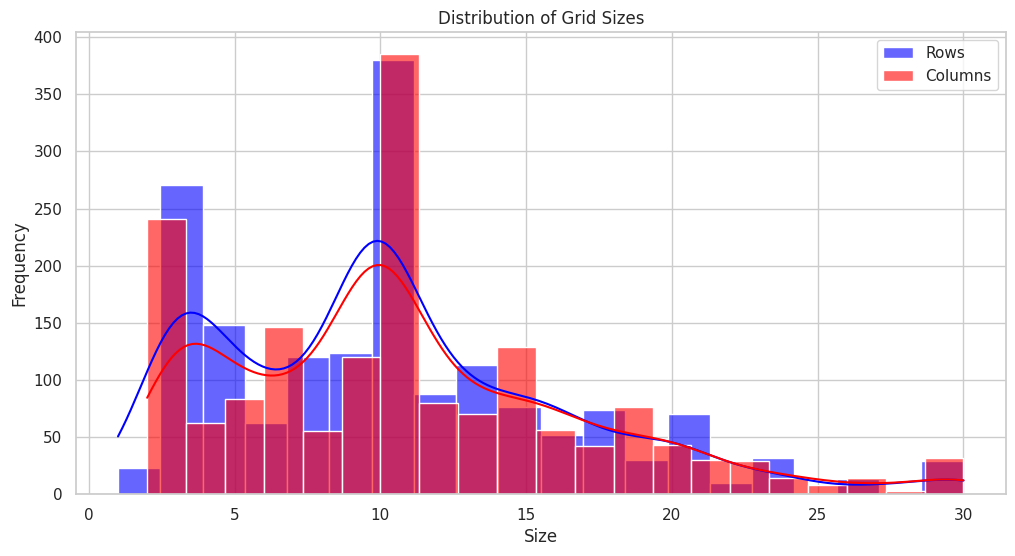

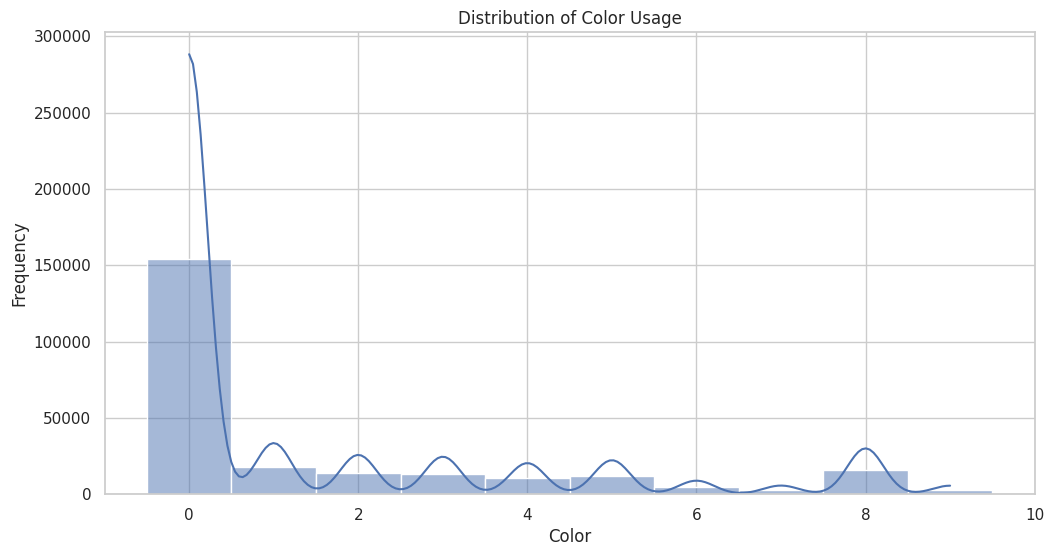

In [2]:
# Import necessary libraries
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better visualizations
sns.set(style="whitegrid")

# Function to load a JSON file
def load_json(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

# Function to extract puzzle statistics
def extract_puzzle_stats(data):
    stats = {
        'grid_sizes': [],
        'color_usage': [],
        'transformations': []
    }
    
    def get_grid_size(matrix):
        return (len(matrix), len(matrix[0]))
    
    def get_color_usage(matrix):
        colors, counts = np.unique(matrix, return_counts=True)
        return dict(zip(colors, counts))
    
    def get_transformations(input_matrix, output_matrix):
        # Placeholder for transformation extraction logic
        # Could involve more complex pattern recognition and differencing
        return []
    
    for puzzle in data['train'] + data['test']:
        input_matrix = np.array(puzzle['input'])
        output_matrix = np.array(puzzle['output'])
        
        stats['grid_sizes'].append(get_grid_size(input_matrix))
        stats['color_usage'].append(get_color_usage(input_matrix))
        stats['transformations'].append(get_transformations(input_matrix, output_matrix))
    
    return stats

# Directory containing the training data
data_dir = '../data/training'

# Collect stats from all JSON files
all_stats = {
    'grid_sizes': [],
    'color_usage': [],
    'transformations': []
}

for file_name in os.listdir(data_dir):
    if file_name.endswith('.json'):
        file_path = os.path.join(data_dir, file_name)
        data = load_json(file_path)
        stats = extract_puzzle_stats(data)
        
        all_stats['grid_sizes'].extend(stats['grid_sizes'])
        all_stats['color_usage'].extend(stats['color_usage'])
        all_stats['transformations'].extend(stats['transformations'])

# Extract grid sizes
grid_sizes = np.array(all_stats['grid_sizes'])

# Plot grid size distribution
plt.figure(figsize=(12, 6))
sns.histplot(grid_sizes[:, 0], kde=True, label='Rows', color='blue', alpha=0.6)
sns.histplot(grid_sizes[:, 1], kde=True, label='Columns', color='red', alpha=0.6)
plt.title('Distribution of Grid Sizes')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Flatten color usage data
color_usage = []
for usage_dict in all_stats['color_usage']:
    for color, count in usage_dict.items():
        color_usage.extend([color] * count)

# Plot color usage distribution
plt.figure(figsize=(12, 6))
sns.histplot(color_usage, kde=True, discrete=True)
plt.title('Distribution of Color Usage')
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.show()
